In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu113 True


In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-vfp4pvxb
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-vfp4pvxb
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 74 kB 4.2 MB/s 
     |████████████████████████████████| 147 kB 73.4 MB/s 
     |████████████████████████████████| 130 kB 72.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 749 kB 63.3 MB/s 
     |████████████████████████████████| 843 kB 56.8 MB/s 
     |████████████████████████████████| 596 kB 42.4 MB/s 
     |████████████████████████████████| 112 kB 78.2 MB/s 
  Created wheel for detectron2: filename=detectron2-0.6-cp37-cp37m-linux_x86_64.whl size=5283148 sha256=82bb2f087746007d8b28304f6996b1a7f648147ef160d3869c3955a99c90167e
  Stored in directory: /tmp/pip-ephem-wheel-cache-xswhln3l/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm # progress bar
from datetime import datetime
import time
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import os, json, cv2, random
import skimage.io as io
import copy
from pathlib import Path
from typing import Optional



from tqdm import tqdm
import itertools

import torch
import albumentations as A
from albumentations.pytorch import transforms#ToTensorV2

from glob import glob
import numba
from numba import jit

import warnings
warnings.filterwarnings('ignore') #Ignore "future" warnings and Data-Frame-Slicing warnings.


# detectron2
from detectron2.structures import BoxMode
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultPredictor, DefaultTrainer, launch
from detectron2.evaluation import COCOEvaluator
from detectron2.structures import BoxMode
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import Visualizer

from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader
from detectron2.data import detection_utils as utils


from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader
from detectron2.data import detection_utils as utils
import detectron2.data.transforms as T
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

setup_logger()

<Logger detectron2 (DEBUG)>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import pandas as pd
import numpy as np
import pandas as pd

with open('/content/drive/MyDrive/kvasir/bboxes.json') as f:
    bbox = json.load(f)

file_path=r'/content/drive/MyDrive/kvasir/test.txt'
path=r'kvasir'
# load_data(path,file_path)
f = open(file_path, "r")
train = f.read().split("\n")[:-1]
file_path=r'/content/drive/MyDrive/kvasir/test.txt'
path=r'kvasir'
# load_data(path,file_path)
f = open(file_path, "r")
test = f.read().split("\n")[:-1]
df=pd.DataFrame(test)
h=[]
w=[]
l=[]
xmin=[]
xmax=[]
ymin=[]
ymax=[]
for j in df[0]:
    h.append(bbox[j]['height'])
    w.append(bbox[j]['width'])
    l.append(bbox[j]['bbox'][0]['label'])
    xmin.append(bbox[j]['bbox'][0]['xmin'])
    xmax.append(bbox[j]['bbox'][0]['xmax'])
    ymin.append(bbox[j]['bbox'][0]['ymin'])
    ymax.append(bbox[j]['bbox'][0]['ymax'])
df['height']=h
df['width']=w
df['label']=l
df['xmin']=xmin
df['ymin']=ymin
df['xmax']=xmax
df['ymax']=ymax
df.rename(columns={0: 'filename'}, inplace=True)
test_df=df
test_df["filename"] = df["filename"]+".jpg"
test_df['filename']="/content/drive/MyDrive/kvasir/prep/" +test_df['filename']
train_df=pd.DataFrame(train)
h=[]
w=[]
l=[]
xmin=[]
xmax=[]
ymin=[]
ymax=[]
for j in train_df[0]:
    h.append(bbox[j]['height'])
    w.append(bbox[j]['width'])
    l.append(bbox[j]['bbox'][0]['label'])
    xmin.append(bbox[j]['bbox'][0]['xmin'])
    xmax.append(bbox[j]['bbox'][0]['xmax'])
    ymin.append(bbox[j]['bbox'][0]['ymin'])
    ymax.append(bbox[j]['bbox'][0]['ymax'])

train_df['height']=663
train_df['width']=855
train_df['label']=l
train_df['xmin']=xmin
train_df['ymin']=ymin
train_df['xmax']=xmax
train_df['ymax']=ymax
train_df.rename(columns={0: 'image_id'}, inplace=True)
train_df["image"] = train_df["image_id"]+".jpg"
train_df['image_path']='/content/drive/MyDrive/kvasir/prep/'+train_df['image']



In [ ]:
train_df.head()

,image_id,height,width,label,xmin,ymin,xmax,ymax,image,image_path
0,ckd4ipizn000d3b5yk2vrbyyz,663,855,instrument,435,25,717,410,ckd4ipizn000d3b5yk2vrbyyz.jpg,/content/drive/MyDrive/kvasir/prep/ckd4ipizn00...
1,ckcxct8oj000k3b5y9iwia72h,663,855,instrument,387,376,613,555,ckcxct8oj000k3b5y9iwia72h.jpg,/content/drive/MyDrive/kvasir/prep/ckcxct8oj00...
2,ckd4ig3d700043b5y0p70afjj,663,855,instrument,238,11,427,462,ckd4ig3d700043b5y0p70afjj.jpg,/content/drive/MyDrive/kvasir/prep/ckd4ig3d700...
3,ckd03in4g001d3b5yngyc734r,663,855,instrument,396,26,524,318,ckd03in4g001d3b5yngyc734r.jpg,/content/drive/MyDrive/kvasir/prep/ckd03in4g00...
4,ckcx9nmko001u3b5yopeccdvo,663,855,instrument,90,17,431,195,ckcx9nmko001u3b5yopeccdvo.jpg,/content/drive/MyDrive/kvasir/prep/ckcx9nmko00...


In [ ]:
df_train=train_df.drop('label',axis=1)
df_train.head()

,image_id,height,width,xmin,ymin,xmax,ymax,image,image_path
0,ckd4ipizn000d3b5yk2vrbyyz,663,855,435,25,717,410,ckd4ipizn000d3b5yk2vrbyyz.jpg,/content/drive/MyDrive/kvasir/prep/ckd4ipizn00...
1,ckcxct8oj000k3b5y9iwia72h,663,855,387,376,613,555,ckcxct8oj000k3b5y9iwia72h.jpg,/content/drive/MyDrive/kvasir/prep/ckcxct8oj00...
2,ckd4ig3d700043b5y0p70afjj,663,855,238,11,427,462,ckd4ig3d700043b5y0p70afjj.jpg,/content/drive/MyDrive/kvasir/prep/ckd4ig3d700...
3,ckd03in4g001d3b5yngyc734r,663,855,396,26,524,318,ckd03in4g001d3b5yngyc734r.jpg,/content/drive/MyDrive/kvasir/prep/ckd03in4g00...
4,ckcx9nmko001u3b5yopeccdvo,663,855,90,17,431,195,ckcx9nmko001u3b5yopeccdvo.jpg,/content/drive/MyDrive/kvasir/prep/ckcx9nmko00...


In [ ]:
x_min = df_train['xmin']
y_min = df_train['ymin']
x_max = df_train['xmax']
y_max = df_train['ymax']
bboxes = list()
for i in range(len(x_min)):
    bboxes.append([[x_min[i],y_min[i],x_max[i],y_max[i]]])
df_train['bboxes'] = bboxes
df_train.head()

,image_id,height,width,xmin,ymin,xmax,ymax,image,image_path,bboxes
0,ckd4ipizn000d3b5yk2vrbyyz,663,855,435,25,717,410,ckd4ipizn000d3b5yk2vrbyyz.jpg,/content/drive/MyDrive/kvasir/prep/ckd4ipizn00...,"[[435, 25, 717, 410]]"
1,ckcxct8oj000k3b5y9iwia72h,663,855,387,376,613,555,ckcxct8oj000k3b5y9iwia72h.jpg,/content/drive/MyDrive/kvasir/prep/ckcxct8oj00...,"[[387, 376, 613, 555]]"
2,ckd4ig3d700043b5y0p70afjj,663,855,238,11,427,462,ckd4ig3d700043b5y0p70afjj.jpg,/content/drive/MyDrive/kvasir/prep/ckd4ig3d700...,"[[238, 11, 427, 462]]"
3,ckd03in4g001d3b5yngyc734r,663,855,396,26,524,318,ckd03in4g001d3b5yngyc734r.jpg,/content/drive/MyDrive/kvasir/prep/ckd03in4g00...,"[[396, 26, 524, 318]]"
4,ckcx9nmko001u3b5yopeccdvo,663,855,90,17,431,195,ckcx9nmko001u3b5yopeccdvo.jpg,/content/drive/MyDrive/kvasir/prep/ckcx9nmko00...,"[[90, 17, 431, 195]]"


In [ ]:
df_train['width'].unique()

array([855])

In [ ]:
df_train.describe()

,height,width,xmin,ymin,xmax,ymax
count,118.0,118.0,118.000000,118.000000,118.000000,118.000000
mean,663.0,855.0,315.855932,149.381356,594.559322,474.152542
std,0.0,0.0,209.091616,180.283297,243.830351,187.417201
min,663.0,855.0,0.000000,0.000000,169.000000,186.000000
25%,663.0,855.0,93.000000,21.000000,430.250000,360.750000
50%,663.0,855.0,351.000000,26.000000,568.500000,431.500000
75%,663.0,855.0,431.500000,341.000000,671.000000,559.500000
max,663.0,855.0,1003.000000,618.000000,1634.000000,1020.000000


In [ ]:
df_train['height'].unique()

array([663])

In [ ]:
df_train.head()

,image_id,height,width,xmin,ymin,xmax,ymax,image,image_path,bboxes
0,ckd4ipizn000d3b5yk2vrbyyz,663,855,435,25,717,410,ckd4ipizn000d3b5yk2vrbyyz.jpg,/content/drive/MyDrive/kvasir/prep/ckd4ipizn00...,"[[435, 25, 717, 410]]"
1,ckcxct8oj000k3b5y9iwia72h,663,855,387,376,613,555,ckcxct8oj000k3b5y9iwia72h.jpg,/content/drive/MyDrive/kvasir/prep/ckcxct8oj00...,"[[387, 376, 613, 555]]"
2,ckd4ig3d700043b5y0p70afjj,663,855,238,11,427,462,ckd4ig3d700043b5y0p70afjj.jpg,/content/drive/MyDrive/kvasir/prep/ckd4ig3d700...,"[[238, 11, 427, 462]]"
3,ckd03in4g001d3b5yngyc734r,663,855,396,26,524,318,ckd03in4g001d3b5yngyc734r.jpg,/content/drive/MyDrive/kvasir/prep/ckd03in4g00...,"[[396, 26, 524, 318]]"
4,ckcx9nmko001u3b5yopeccdvo,663,855,90,17,431,195,ckcx9nmko001u3b5yopeccdvo.jpg,/content/drive/MyDrive/kvasir/prep/ckcx9nmko00...,"[[90, 17, 431, 195]]"


In [ ]:
n_spl=3
Selected_Fold=2 #0..2

from sklearn.model_selection import GroupKFold
gkf  = GroupKFold(n_splits = n_spl) # num_folds=3 as there are total 3 videos
df_train = df_train.reset_index(drop=True)
df_train['fold'] = -1
for fold, (train_idx, val_idx) in enumerate(gkf.split(df_train, groups = df_train.image_id.tolist())):
    df_train.loc[val_idx, 'fold'] = fold
display(df_train.fold.value_counts())

0    40
1    39
2    39
Name: fold, dtype: int64

In [ ]:
def get_data_dicts(
    _train_df: pd.DataFrame,
    debug: bool = False,
    data_type:str="train"

):

    if debug:
        _train_df = _train_df.iloc[:10]  # For debug...
    dataset_dicts = []
    if data_type=="train":
        _train_df=_train_df[_train_df.fold != Selected_Fold]
    else: # val
        _train_df=_train_df[_train_df.fold == Selected_Fold]

    for index, row in tqdm(_train_df.iterrows(), total=len(_train_df)):
        record = {}
        filename  = row.image_path #filename = str(f'{imgdir}/{image_id}.png')
        image_id = row.image_id
        image_height= row.height
        image_width = row.width
        bboxes_coco = row.bboxes
        #bboxes_coco  = np.array(row.bboxes).astype(np.float32).copy()
        record["file_name"] = filename
        record["image_id"] = image_id
        record["width"] = image_width
        record["height"] = image_height
        objs = []
        class_id = 0
        for bbox_idx in range(len(bboxes_coco)):
            bbox=bboxes_coco[bbox_idx]
            obj = {
                    "bbox": bbox,
                    "bbox_mode": BoxMode.XYXY_ABS,
                    "category_id": class_id,
                }
            objs.append(obj)
            record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [ ]:
thing_classes=['instrument']
debug=False

Data_Resister_training="BR_data_train2";
Data_Resister_valid="BR_data_valid2";


DatasetCatalog.register(
    Data_Resister_training,
    lambda: get_data_dicts(
        df_train,
        debug=debug,
        data_type="train"
    ),
)
MetadataCatalog.get(Data_Resister_training).set(thing_classes=thing_classes)


DatasetCatalog.register(
    Data_Resister_valid,
    lambda: get_data_dicts(
        df_train,
        debug=debug,
        data_type="val"
        ),
    )
MetadataCatalog.get(Data_Resister_valid).set(thing_classes=thing_classes)


dataset_dicts_train = DatasetCatalog.get(Data_Resister_training)
metadata_dicts_train = MetadataCatalog.get(Data_Resister_training)

dataset_dicts_valid = DatasetCatalog.get(Data_Resister_valid)
metadata_dicts_valid = MetadataCatalog.get(Data_Resister_valid)

100%|██████████| 39/39 [00:00<00:00, 2290.01it/s]


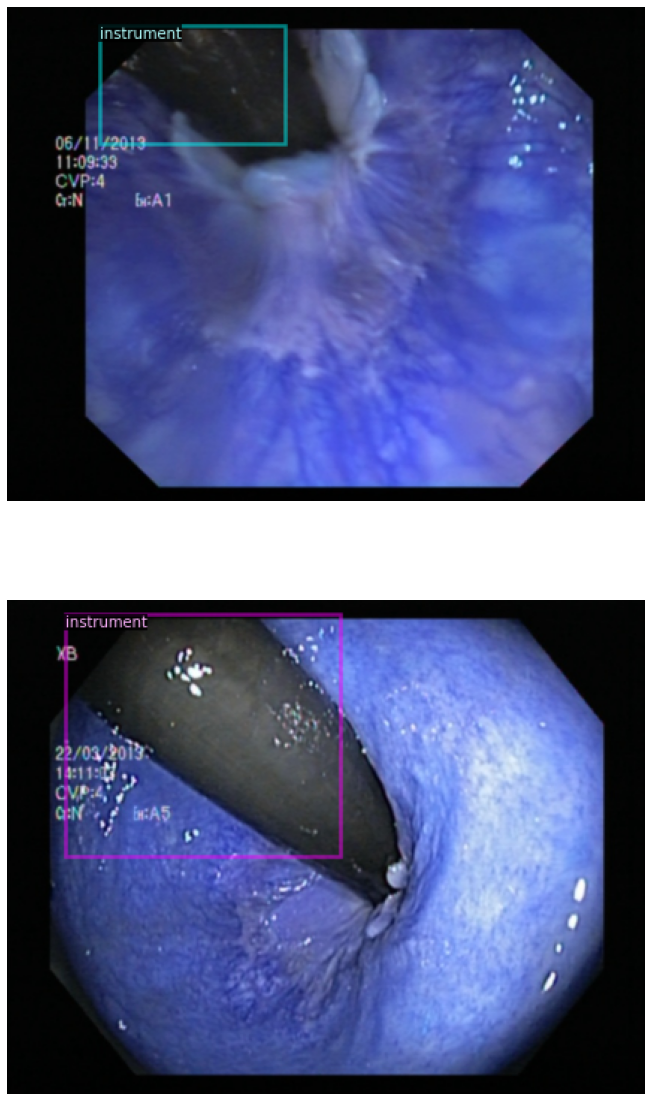

In [ ]:
fig, ax = plt.subplots(2, 1, figsize =(35,20))
i=-1
for d in random.sample(dataset_dicts_train, 2):
    i=i+1
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, :],
                   metadata=metadata_dicts_train,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_dataset_dict(d)
    ax[i].grid(False)
    ax[i].axis('off')
    ax[i].imshow(out.get_image()[:, :, ::-1])

In [ ]:
import logging
import numpy as np
from detectron2.engine.hooks import HookBase
from detectron2.evaluation import inference_context
from detectron2.utils.logger import log_every_n_seconds
from detectron2.data import DatasetMapper, build_detection_test_loader
import detectron2.utils.comm as comm
import torch
import time
import datetime

class LossEvalHook(HookBase):
    def __init__(self, cfg, model, data_loader):
        self._model = model
        self._period = cfg.TEST.EVAL_PERIOD
        self._root = cfg.OUTPUT_DIR
        self._data_loader = data_loader
        self._min_mean_loss = 0.0
        self._bfirst = True

    def _do_loss_eval(self):
        # Copying inference_on_dataset from evaluator.py
        total = len(self._data_loader)
        num_warmup = min(5, total - 1)

        start_time = time.perf_counter()
        total_compute_time = 0
        losses = []
        for idx, inputs in enumerate(self._data_loader):
            if idx == num_warmup:
                start_time = time.perf_counter()
                total_compute_time = 0
            start_compute_time = time.perf_counter()
            if torch.cuda.is_available():
                torch.cuda.synchronize()
            total_compute_time += time.perf_counter() - start_compute_time
            iters_after_start = idx + 1 - num_warmup * int(idx >= num_warmup)
            seconds_per_img = total_compute_time / iters_after_start
            if idx >= num_warmup * 2 or seconds_per_img > 5:
                total_seconds_per_img = (time.perf_counter() - start_time) / iters_after_start
                eta = datetime.timedelta(seconds=int(total_seconds_per_img * (total - idx - 1)))
                log_every_n_seconds(
                    logging.INFO,
                    "Loss on Validation  done {}/{}. {:.4f} s / img. ETA={}".format(
                        idx + 1, total, seconds_per_img, str(eta)
                    ),
                    n=5,
                )
            loss_batch = self._get_loss(inputs)
            losses.append(loss_batch)
        mean_loss = np.mean(losses)
        self.trainer.storage.put_scalar('validation_loss', mean_loss)
        comm.synchronize()
        return mean_loss

    def _get_loss(self, data):
        # How loss is calculated on train_loop
        metrics_dict = self._model(data)
        metrics_dict = {
            k: v.detach().cpu().item() if isinstance(v, torch.Tensor) else float(v)
            for k, v in metrics_dict.items()
        }
        total_losses_reduced = sum(loss for loss in metrics_dict.values())
        return total_losses_reduced

    def after_step(self):
        next_iter = self.trainer.iter + 1
        is_final = next_iter == self.trainer.max_iter
        if is_final or (self._period > 0 and next_iter % self._period == 0):
            mean_loss = self._do_loss_eval()
            if self._bfirst:
                self._min_mean_loss = mean_loss
                self._bfirst = False
            #-------- save best model according to metrics --------
            if mean_loss < self._min_mean_loss:
                self._min_mean_loss = mean_loss
                self.trainer.checkpointer.save('model_best')
                with open('bestiter.txt', 'a+') as f:
                    f.write('min val loss: ' + str(mean_loss) + ' at iter: ' + str(self.trainer.iter) + '\n')

In [ ]:
class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name,("bbox",), True, output_folder)
        #return COCOEvaluator(dataset_name, cfg, True, output_folder)

        #return MAPIOUEvaluator(dataset_name)

    def build_hooks(self):
        hooks = super().build_hooks()
        hooks.insert(-1,LossEvalHook(
            self.cfg,
            self.model,
            build_detection_test_loader(
                self.cfg,
                self.cfg.DATASETS.TEST[0],
                DatasetMapper(self.cfg,True)
            )
        ))
        return hooks

In [ ]:
cfg = get_cfg()
config_name = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(config_name))
cfg.DATASETS.TRAIN = (Data_Resister_training,)
cfg.DATASETS.TEST = (Data_Resister_valid,)

cfg.MODEL.WEIGHTS ="../input/brdetectron2l/output/model_best.pth"

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_name)

cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # 64 is slower but more accurate (128 faster but less accurate)


cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # only has one class  + 1
cfg.MODEL.RETINANET.NUM_CLASSES = 2 # only has one class  + 1

cfg.SOLVER.IMS_PER_BATCH = 2 #(2 is per defaults)
cfg.SOLVER.BASE_LR = 0.0005 #(quite high base learning rate but should drop)
cfg.SOLVER.GAMMA = 0.1


cfg.SOLVER.WARMUP_ITERS = 10 #How many iterations to go from 0 to reach base LR
cfg.SOLVER.MAX_ITER = 800 #Maximum of iterations 1
cfg.SOLVER.STEPS = (200,400,750) #At which point to change the LR 0.25,0.5

cfg.TEST.EVAL_PERIOD = 60
#cfg.SOLVER.CHECKPOINT_PERIOD=100

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
#trainer = AugTrainer(cfg) # with  data augmentation
trainer = Trainer(cfg)  # without data augmentation
trainer.resume_or_load(resume=False)
trainer.train()

[05/15 17:24:25 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

100%|██████████| 79/79 [00:00<00:00, 9604.35it/s]

[05/15 17:24:25 d2.data.build]: Removed 0 images with no usable annotations. 79 images left.
[05/15 17:24:25 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
| instrument | 79           |
|            |              |
[05/15 17:24:25 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[05/15 17:24:25 d2.data.build]: Using training sampler TrainingSampler
[05/15 17:24:25 d2.data.common]: Serializing 79 elements to byte tensors and concatenating them all ...
[05/15 17:24:25 d2.data.common]: Serialized dataset takes 0.03 MiB


[05/15 17:24:27 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]


100%|██████████| 39/39 [00:00<00:00, 11335.96it/s]

[05/15 17:24:27 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
| instrument | 39           |
|            |              |
[05/15 17:24:27 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:24:27 d2.data.common]: Serialized dataset takes 0.02 MiB



model_final_280758.pkl: 167MB [00:09, 17.3MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_pr

[05/15 17:24:39 d2.engine.train_loop]: Starting training from iteration 0
[05/15 17:24:57 d2.utils.events]:  eta: 0:11:39  iter: 19  total_loss: 0.9499  loss_cls: 0.4735  loss_box_reg: 0.3414  loss_rpn_cls: 0.02421  loss_rpn_loc: 0.009488  time: 0.8965  data_time: 0.5284  lr: 0.0005  max_mem: 2250M
[05/15 17:25:13 d2.utils.events]:  eta: 0:10:55  iter: 39  total_loss: 0.6793  loss_cls: 0.2596  loss_box_reg: 0.3537  loss_rpn_cls: 0.02987  loss_rpn_loc: 0.007105  time: 0.8375  data_time: 0.3963  lr: 0.0005  max_mem: 2252M


100%|██████████| 39/39 [00:00<00:00, 6094.10it/s]

[05/15 17:25:21 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:25:21 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:25:21 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:25:21 d2.evaluation.coco_evaluation]: Trying to convert 'BR_data_valid2' to COCO format ...
[05/15 17:25:21 d2.data.datasets.coco]: Converting annotations of dataset 'BR_data_valid2' to COCO format ...)



100%|██████████| 39/39 [00:00<00:00, 12116.88it/s]

[05/15 17:25:21 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[05/15 17:25:21 d2.data.datasets.coco]: Conversion finished, #images: 39, #annotations: 39
[05/15 17:25:21 d2.data.datasets.coco]: Caching COCO format annotations at './output/inference/BR_data_valid2_coco_format.json' ...
[05/15 17:25:21 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:25:26 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.3692 s/iter. Inference: 0.0942 s/iter. Eval: 0.0002 s/iter. Total: 0.4637 s/iter. ETA=0:00:12
[05/15 17:25:32 d2.evaluation.evaluator]: Inference done 23/39. Dataloading: 0.3436 s/iter. Inference: 0.0946 s/iter. Eval: 0.0003 s/iter. Total: 0.4386 s/iter. ETA=0:00:07
[05/15 17:25:37 d2.evaluation.evaluator]: Inference done 37/39. Dataloading: 0.3245 s/iter. Inference: 0.0948 s/iter. Eval: 0.0003 s/iter. Total: 0.4198 s/iter. ETA=0:00:00
[05/15 17:25:38 d2.evaluation.evaluator]: Total inference time: 0:00:14.292703 (0.420374 s / iter per device, on 1 devices)
[05/15 17:25:38 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.094734 s / iter per device, on 1 devices)
[05/15 17:25:38 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:25:38 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:25:38 d2.evaluatio

100%|██████████| 39/39 [00:00<00:00, 5799.81it/s]

[05/15 17:26:06 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:26:06 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:26:06 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:26:06 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:26:07 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0013 s/iter. Inference: 0.1011 s/iter. Eval: 0.0002 s/iter. Total: 0.1027 s/iter. ETA=0:00:02
[05/15 17:26:10 d2.evaluation.evaluator]: Total inference time: 0:00:03.513744 (0.103345 s / iter per device, on 1 devices)
[05/15 17:26:10 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.099577 s / iter per device, on 1 devices)
[05/15 17:26:10 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:26:10 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:26:10 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:26:10 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:26:10 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.02 seconds.
[05/15 17:26:10 d2.e

100%|██████████| 39/39 [00:00<00:00, 5606.59it/s]

[05/15 17:26:40 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:26:40 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:26:40 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:26:40 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:26:41 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0014 s/iter. Inference: 0.1035 s/iter. Eval: 0.0002 s/iter. Total: 0.1051 s/iter. ETA=0:00:02
[05/15 17:26:44 d2.evaluation.evaluator]: Total inference time: 0:00:03.612109 (0.106238 s / iter per device, on 1 devices)
[05/15 17:26:44 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.102380 s / iter per device, on 1 devices)
[05/15 17:26:44 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:26:44 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:26:44 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:26:44 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:26:44 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[05/15 17:26:44 d2.e

100%|██████████| 39/39 [00:00<00:00, 10907.37it/s]

[05/15 17:27:14 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:27:14 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:27:14 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:27:14 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:27:16 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0015 s/iter. Inference: 0.1032 s/iter. Eval: 0.0002 s/iter. Total: 0.1049 s/iter. ETA=0:00:02
[05/15 17:27:19 d2.evaluation.evaluator]: Total inference time: 0:00:03.609465 (0.106161 s / iter per device, on 1 devices)
[05/15 17:27:19 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.102088 s / iter per device, on 1 devices)
[05/15 17:27:19 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:27:19 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:27:19 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:27:19 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:27:19 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[05/15 17:27:19 d2.e

100%|██████████| 39/39 [00:00<00:00, 5267.53it/s]

[05/15 17:27:48 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:27:48 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:27:48 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:27:48 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:27:49 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0015 s/iter. Inference: 0.1023 s/iter. Eval: 0.0002 s/iter. Total: 0.1040 s/iter. ETA=0:00:02
[05/15 17:27:52 d2.evaluation.evaluator]: Total inference time: 0:00:03.592561 (0.105664 s / iter per device, on 1 devices)
[05/15 17:27:52 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.101675 s / iter per device, on 1 devices)
[05/15 17:27:52 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:27:52 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:27:52 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:27:52 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:27:52 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[05/15 17:27:52 d2.e

100%|██████████| 39/39 [00:00<00:00, 5172.42it/s]

[05/15 17:28:21 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:28:21 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:28:21 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:28:21 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:28:22 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0014 s/iter. Inference: 0.1029 s/iter. Eval: 0.0002 s/iter. Total: 0.1045 s/iter. ETA=0:00:02
[05/15 17:28:25 d2.evaluation.evaluator]: Total inference time: 0:00:03.610612 (0.106194 s / iter per device, on 1 devices)
[05/15 17:28:25 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.102102 s / iter per device, on 1 devices)
[05/15 17:28:25 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:28:25 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:28:25 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:28:25 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:28:25 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[05/15 17:28:25 d2.e

100%|██████████| 39/39 [00:00<00:00, 10971.02it/s]

[05/15 17:28:53 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:28:53 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:28:53 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:28:53 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:28:54 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0012 s/iter. Inference: 0.1030 s/iter. Eval: 0.0002 s/iter. Total: 0.1044 s/iter. ETA=0:00:02
[05/15 17:28:57 d2.evaluation.evaluator]: Total inference time: 0:00:03.599937 (0.105880 s / iter per device, on 1 devices)
[05/15 17:28:57 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.101865 s / iter per device, on 1 devices)
[05/15 17:28:57 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:28:57 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:28:57 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:28:57 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:28:57 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.02 seconds.
[05/15 17:28:57 d2.e

100%|██████████| 39/39 [00:00<00:00, 7087.12it/s]

[05/15 17:29:26 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:29:26 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:29:26 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:29:26 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:29:27 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0016 s/iter. Inference: 0.1016 s/iter. Eval: 0.0002 s/iter. Total: 0.1034 s/iter. ETA=0:00:02
[05/15 17:29:30 d2.evaluation.evaluator]: Total inference time: 0:00:03.563099 (0.104797 s / iter per device, on 1 devices)
[05/15 17:29:30 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.100982 s / iter per device, on 1 devices)
[05/15 17:29:30 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:29:30 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:29:30 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:29:30 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:29:30 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[05/15 17:29:30 d2.e

100%|██████████| 39/39 [00:00<00:00, 5666.80it/s]

[05/15 17:29:59 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:29:59 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:29:59 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:29:59 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:30:00 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0014 s/iter. Inference: 0.1027 s/iter. Eval: 0.0002 s/iter. Total: 0.1043 s/iter. ETA=0:00:02
[05/15 17:30:03 d2.evaluation.evaluator]: Total inference time: 0:00:03.592687 (0.105667 s / iter per device, on 1 devices)
[05/15 17:30:03 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.101850 s / iter per device, on 1 devices)
[05/15 17:30:03 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:30:03 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:30:03 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:30:03 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:30:03 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[05/15 17:30:03 d2.e

100%|██████████| 39/39 [00:00<00:00, 5044.65it/s]

[05/15 17:30:34 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:30:34 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:30:34 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:30:34 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:30:35 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0013 s/iter. Inference: 0.1029 s/iter. Eval: 0.0002 s/iter. Total: 0.1044 s/iter. ETA=0:00:02
[05/15 17:30:38 d2.evaluation.evaluator]: Total inference time: 0:00:03.588875 (0.105555 s / iter per device, on 1 devices)
[05/15 17:30:38 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.101558 s / iter per device, on 1 devices)
[05/15 17:30:38 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:30:38 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:30:38 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:30:38 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:30:38 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[05/15 17:30:38 d2.e

100%|██████████| 39/39 [00:00<00:00, 5308.04it/s]

[05/15 17:31:07 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:31:07 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:31:07 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:31:07 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:31:08 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0013 s/iter. Inference: 0.1031 s/iter. Eval: 0.0002 s/iter. Total: 0.1047 s/iter. ETA=0:00:02
[05/15 17:31:11 d2.evaluation.evaluator]: Total inference time: 0:00:03.590755 (0.105610 s / iter per device, on 1 devices)
[05/15 17:31:11 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.101778 s / iter per device, on 1 devices)
[05/15 17:31:11 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:31:11 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:31:11 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:31:11 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:31:11 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[05/15 17:31:11 d2.e

100%|██████████| 39/39 [00:00<00:00, 11964.44it/s]

[05/15 17:31:39 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:31:39 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:31:39 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:31:39 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:31:41 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0013 s/iter. Inference: 0.1008 s/iter. Eval: 0.0002 s/iter. Total: 0.1023 s/iter. ETA=0:00:02
[05/15 17:31:44 d2.evaluation.evaluator]: Total inference time: 0:00:03.589597 (0.105576 s / iter per device, on 1 devices)
[05/15 17:31:44 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.101573 s / iter per device, on 1 devices)
[05/15 17:31:44 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:31:44 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:31:44 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:31:44 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:31:44 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[05/15 17:31:44 d2.e

100%|██████████| 39/39 [00:00<00:00, 4609.13it/s]

[05/15 17:32:12 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:32:12 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:32:12 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:32:12 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:32:14 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0013 s/iter. Inference: 0.1025 s/iter. Eval: 0.0002 s/iter. Total: 0.1040 s/iter. ETA=0:00:02
[05/15 17:32:17 d2.evaluation.evaluator]: Total inference time: 0:00:03.594055 (0.105707 s / iter per device, on 1 devices)
[05/15 17:32:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.101850 s / iter per device, on 1 devices)
[05/15 17:32:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:32:17 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:32:17 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:32:17 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:32:17 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[05/15 17:32:17 d2.e

100%|██████████| 39/39 [00:00<00:00, 4507.64it/s]

[05/15 17:32:33 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/15 17:32:33 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/15 17:32:33 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/15 17:32:33 d2.evaluation.evaluator]: Start inference on 39 batches


[05/15 17:32:35 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0014 s/iter. Inference: 0.1023 s/iter. Eval: 0.0002 s/iter. Total: 0.1039 s/iter. ETA=0:00:02
[05/15 17:32:38 d2.evaluation.evaluator]: Total inference time: 0:00:03.603069 (0.105973 s / iter per device, on 1 devices)
[05/15 17:32:38 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.101703 s / iter per device, on 1 devices)
[05/15 17:32:38 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/15 17:32:38 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/15 17:32:38 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/15 17:32:38 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/15 17:32:38 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[05/15 17:32:38 d2.e

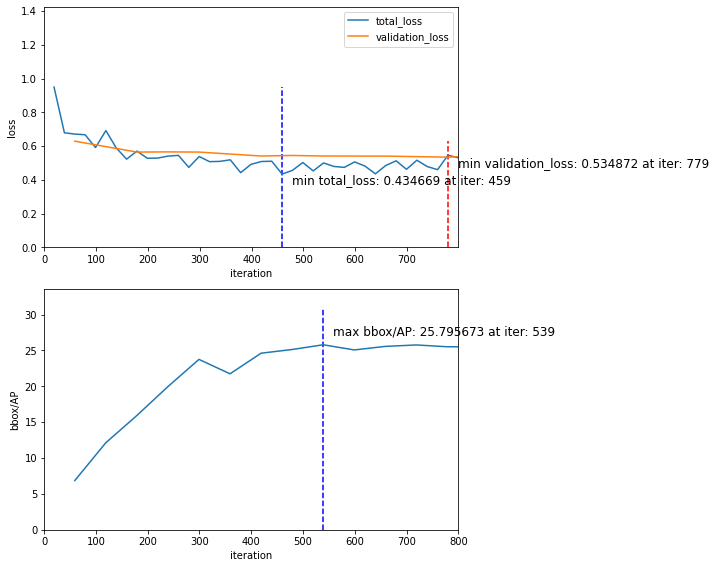

In [ ]:
def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines
experiment_metrics = load_json_arr('./output/metrics.json')

iters_total_loss = [x['iteration'] for x in experiment_metrics if 'total_loss' in x]
total_loss = [x['total_loss'] for x in experiment_metrics if 'total_loss' in x]


iters_validation_loss = [x['iteration'] for x in experiment_metrics if 'validation_loss' in x]
validation_loss = [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x]

iters_AP = [x['iteration'] for x in experiment_metrics if 'bbox/AP' in x]
AP = [x['bbox/AP'] for x in experiment_metrics if 'bbox/AP' in x]

fig, ax = plt.subplots(2,1,figsize=(10,8))
ax[0].plot(iters_total_loss, total_loss)
ax[0].plot(iters_validation_loss, validation_loss)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('loss')
ax[0].legend(['total_loss', 'validation_loss'], loc='best')

iter = validation_loss.index(min(validation_loss))
ax[0].vlines(iters_validation_loss[iter], 0, float(max(validation_loss)),color="red",linestyles ="dashed")
ax[0].annotate('min validation_loss: %f at iter: %d'%(float(min(validation_loss)),int(iters_validation_loss[iter])),xy=(iters_validation_loss[iter],min(validation_loss)),xytext=(+10,-10),textcoords='offset points',fontsize=12) #arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')

iter = total_loss.index(min(total_loss))
ax[0].vlines(iters_total_loss[iter], 0, float(max(total_loss)),color="blue",linestyles ="dashed")
ax[0].annotate('min total_loss: %f at iter: %d'%(float(min(total_loss)),int(iters_total_loss[iter])),xy=(iters_total_loss[iter],min(total_loss)),xytext=(+10,-10),textcoords='offset points',fontsize=12) #arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')

ax[0].set_xlim([0,max(max(iters_total_loss),max(iters_validation_loss))])
ax[0].set_ylim([0,max(1.5*max(total_loss),1.5*max(validation_loss))])
#ax[0].legend(bbox_to_anchor=(1.0, 1.0))

ax[1].plot(iters_AP, AP)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('bbox/AP')
iter = AP.index(max(AP))
ax[1].vlines(iters_AP[iter], 0, 5+float(max(AP)),color="blue",linestyles ="dashed")
ax[1].annotate('max bbox/AP: %f at iter: %d'%(float(max(AP)),int(iters_AP[iter])),xy=(iters_AP[iter],max(AP)),xytext=(+10,+10),textcoords='offset points',fontsize=12) #arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')
ax[1].set_xlim([0,max(iters_AP)])
ax[1].set_ylim([0,max(AP)*1.3])

fig.tight_layout()
plt.show()

[05/15 17:32:39 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

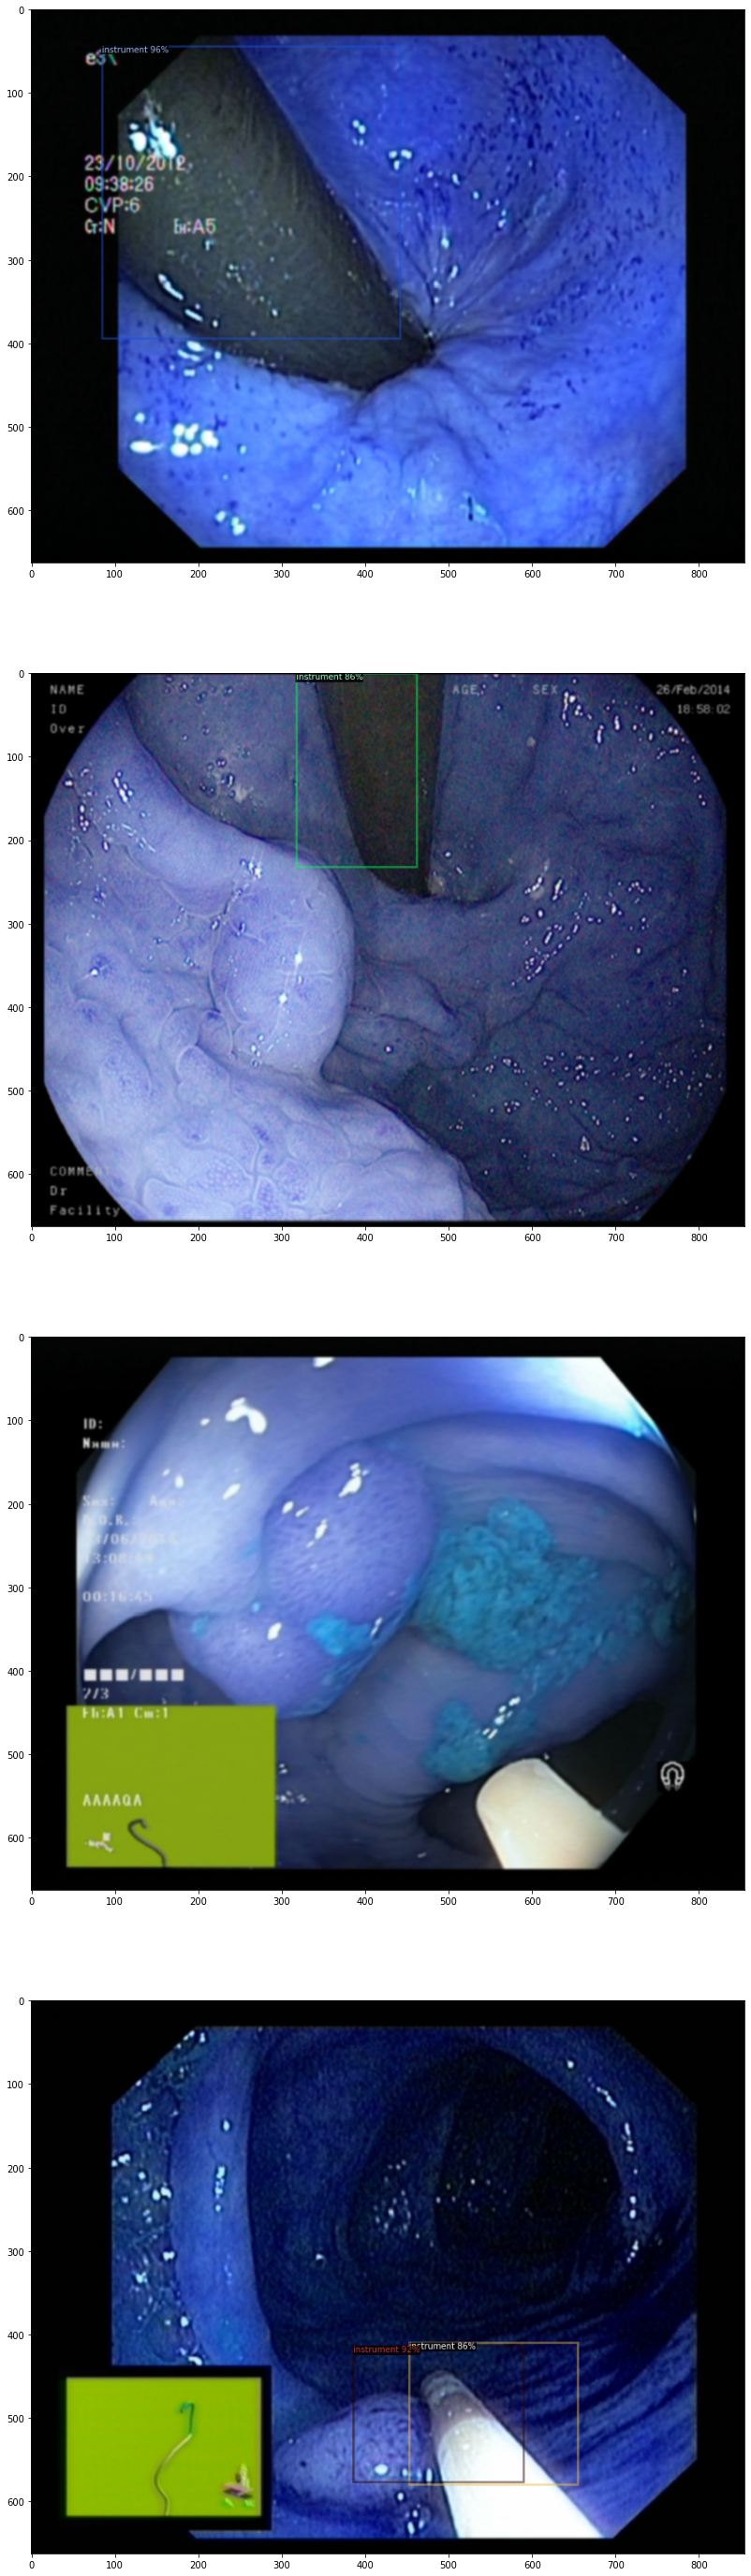

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_best.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg.DATASETS.TEST = (Data_Resister_valid, )
predictor = DefaultPredictor(cfg)

fig, ax = plt.subplots(4, 1, figsize =(20,50))
indices=[ax[0],ax[1],ax[2],ax[3] ]
i=-1
for d in random.sample(dataset_dicts_valid, 4):
    i=i+1
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, :],
                   metadata=metadata_dicts_valid,
                   scale=1 # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])